# Modelamiento Bayesiano

En el enfoque Bayesiano:
- La inferencia se realiza calculado la distribución **a posteriori** de los parámetros
- Se modela la incerteza de los datos y parámetros con una **distribución de probabilidad conjunta**
- $\theta$ es un vector aleatorio cuya distribución de probabilidad se denomina **a priori**

El teorema de Bayes y la ley de probabilidades totales nos permiten escribir:

$$
p(\theta| \cal{D}) = \frac{p(\cal{D}, \theta)}{p(\cal{D})}= \frac{p(\cal{D}|\theta) p(\theta)}{\int p(\cal{D}|\theta) p(\theta) d\theta} \propto p(\cal{D}|\theta) p(\theta),
$$


En el enfoque Bayesiano buscamos calcular la distribución a posteriori, la que se construye a partir de la función de verosimilitud, la distribución a priori y la evidencia, conocida también como la verosimilitud marginal de los datos.


## El procedimiento de inferencia Bayesiana:

1. Definir la función de verosimilitud de los datos
2. Escoger una distribución a priori para los parámetros
3. Construir la distribución conjunta de datos y parámetros
4. Determinar la distribución a posteriori usando el Teorema de Bayes
5. Calcular estimadores puntuales:

**Moda o MAP**
$$
\hat \theta = \text{arg} \max_\theta p(\theta|\cal{D}) =  \text{arg} \max_\theta p(\cal{D}| \theta) p(\theta),
$$

para esta maximización no se requiere la evidencia pues esta no depende de $\theta$. Además aplicando logaritmo podemos separar la verosimilitud de la distribución a priori:

$$
\hat \theta = \text{arg} \max_\theta (\log p(\cal{D}| \theta) + \log p(\theta)),
$$

**Esperanza a posteriori**
$$\mathbb{E}(\theta \mid \cal{D}) = \int \theta p(\theta \mid \cal{D}) d\theta$$

**Varianza a posteriori**
$$\mathbb{V}(\theta \mid \cal{D}) = \int (\theta- \mathbb{E}(\theta \mid \cal{D}))^2 p(\theta \mid \cal{D}) d\theta$$



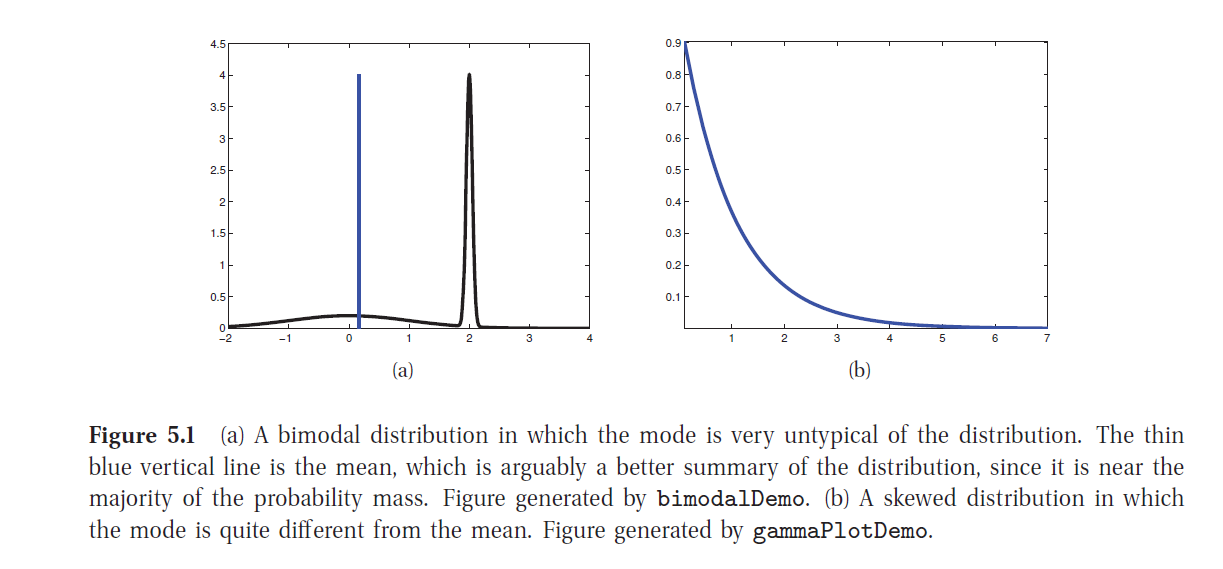

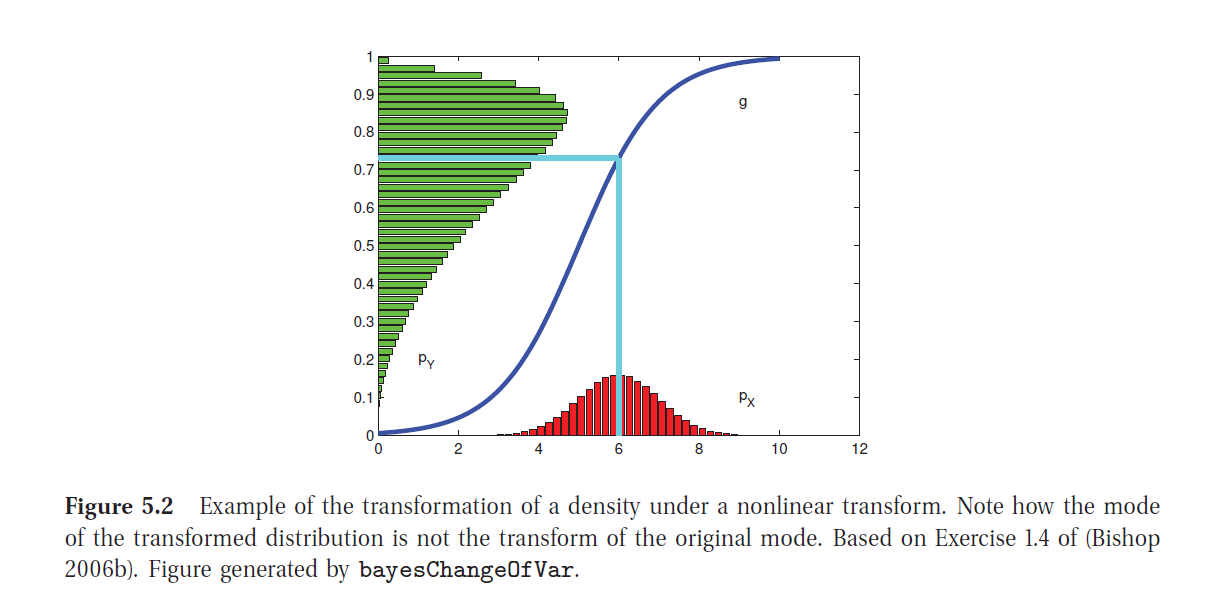

In [2]:
library("IRdisplay")
display_png(file="graficoMAP0.png")
display_png(file="graficoMAP.png")

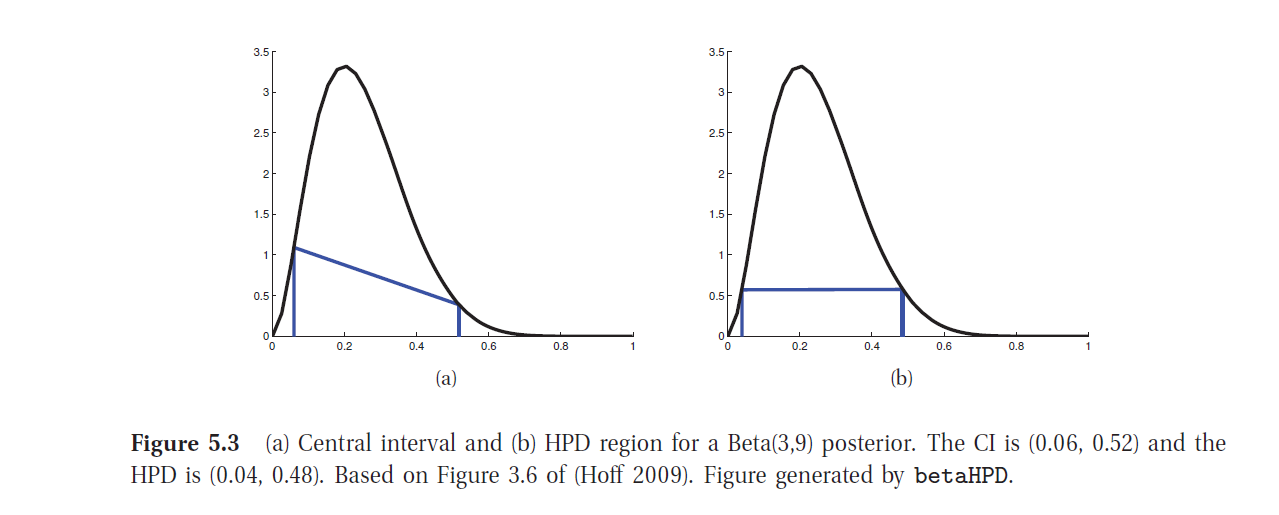

In [3]:
#Otras medidas

display_png(file="graficoCentral.png")

**Distribución Predictiva a posteriori**
$$p(x \mid \cal{D}) = \int p(x \mid \theta) p(\theta \mid \cal{D}) d\theta$$

Nos permite predecir la probabilidad de ocurrencia de un nuevo dato $x$

## Distribuciones a priori

Distribuciones naturales conjugadas: Una elección posible para las distribuciones a priori son aquellas que se conjugan con las funciones  de verosimilitud, de manera que la distribución a posteriori es del mismo tipo que la a priori pero con nuevos parámetros. Veamos algunos ejemplos.

**i) El modelo Beta-binomial**

Consideremos el caso en que 

$$ X_i \sim Binomial(K,\theta) \qquad X_i \in \{0,...,K\}, i \in 1,...,n$$

$$ P(X_i = k\mid \theta) = {{K}\choose{k}} \theta^k (1-\theta)^{(K-k)} \qquad k = 1,...,K$$

Y por otra parte
$$ \theta \sim Beta(a,b) \qquad \theta \in [0,1], a,b>0$$

$$f_{\theta}(\theta) = \frac{\Gamma(a+b)}{ \Gamma(a) \Gamma(b)} \theta^{a-1} (1-\theta)^{b-1} \qquad \theta \in [0,1]$$



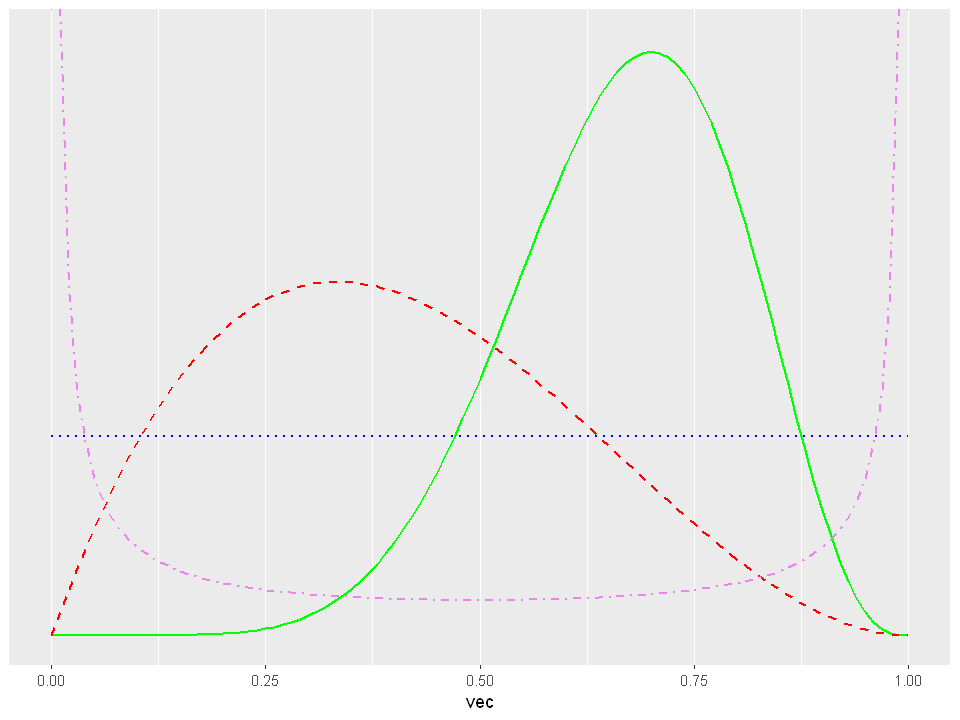

In [4]:
library(ggplot2)
options(repr.plot.width = 8, repr.plot.height = 6)
# Grafico densidad Beta con distintos parámetros
vec <- seq(0,1,by=0.01)
fvec <- data.frame(cbind(vec,dbeta(vec,0.1,0.1),dbeta(vec,1,1),dbeta(vec,2,3),dbeta(vec,8,4)))

h<- ggplot(fvec, aes(x=vec))
h <- h +coord_cartesian(ylim=c(0,3))
h <- h + geom_line(y=fvec$V5,color="green", linetype=1,size=0.8)
h <- h + geom_line(y=fvec$V4,color="red",size=0.8, linetype=2)
h <- h + geom_line(y=fvec$V3,color="blue",size=0.8, linetype=3)
h <- h + geom_line(y=fvec$V2,color="violet", size=0.8,linetype=4)
h


**Algunas Propiedades de la Distribución Beta**

i) $moda(\theta)= \underset{\theta}{\operatorname{argmax}} f_{\theta}(\theta)$

$$\begin{align}
\frac{\partial f_{\theta}(\theta)}{\partial \theta}=0 \qquad &\implies \qquad 
(a-1)\theta^{a-1}(1-\theta)^{b-1} -  (b-1)\theta^{a-1}(1-\theta)^{b-2} =0 \nonumber\\
&\implies \qquad \theta^{a-2}(1-\theta)^{b-2}((a-1)(1-\theta) - (b-1)\theta) =0 \nonumber\\
&\implies \qquad \theta(a-1 + b-1) =a-1 \nonumber\\
&\implies \qquad moda(\theta) = \frac{a-1}{a+b-2} \nonumber\\
\end{align}$$

ii) $\mathbb{E}(\theta) = \int_0^1 \theta f_{\theta}(\theta) d\theta$
$$\begin{align}
\mathbb{E}(\theta) & = \frac{\Gamma(a+b)}{ \Gamma(a) \Gamma(b)} \int_0^1 \theta \theta^{a-1} (1-\theta)^{b-1}d\theta \nonumber\\
& =  \frac{a}{a+b}
\nonumber\\
\end{align}$$

iii) $\mathbb{V}(\theta) = \int_0^1 (\theta- \mathbb{E}(\theta)^2 f_{\theta}(\theta) d\theta$
$$\begin{align}
\mathbb{V}(\theta) & = \frac{\Gamma(a+b)}{ \Gamma(a) \Gamma(b)} \int_0^1 (\theta- \mathbb{E}(\theta)^2 \theta^{a-1} (1-\theta)^{b-1}d\theta \nonumber\\
& =  \frac{ab}{(a+b)^2(a+b+1)}
\nonumber\\
\end{align}$$



**Cálculo de la distribución a posteriori**

$$
\begin{align}
f_{\theta}(\theta \mid \{x_i\}) 
&\propto \prod_{i=1}^n P(X_i=k_i\mid \theta)f_{\theta}(\theta) \nonumber \\
&\propto \prod_{i=1}^n \theta^k (1-\theta)^{(K-k)} \theta^{a-1} (1-\theta)^{b-1} \nonumber \\
&\nonumber\\
&= \theta^{N_1} (1-\theta)^{N_0} \theta^{a-1} (1-\theta)^{b-1} \nonumber \\
& \nonumber\\
&= \theta^{N_1+a-1} (1-\theta)^{N_0+b-1}
\end{align}
$$
donde 
$$N_1 = \sum_{i=1}^n k_i \qquad y \qquad
N_0 = \sum_{i=1}^n (K-k_i)$$
Es decir 
$$ \theta \mid \{x_i\}_{i=1,..,n} \sim Beta(N_1+a,N_0+b)$$

**Moda a posteriori (MAP):**
$$\theta_{MAP}= \underset{\theta}{\operatorname{argmax}} f_{\theta}(\theta \mid \{x_i\})= \frac{a+N_1-1}{a+b+N-2}$$

**Media a posteriori:**

$$\mathbb{E}(\theta \mid \{x_i\}_{i=1,...,n})  = \frac{a+N_1}{a+b+N}$$

**Varianza a posteriori**
$$\mathbb{V}(\theta \mid \{x_i\}_{i=1,...,n})  = \frac{(a+N_1)(b+N_2)}{(a+b+N)^2(a+b+N+1)}$$


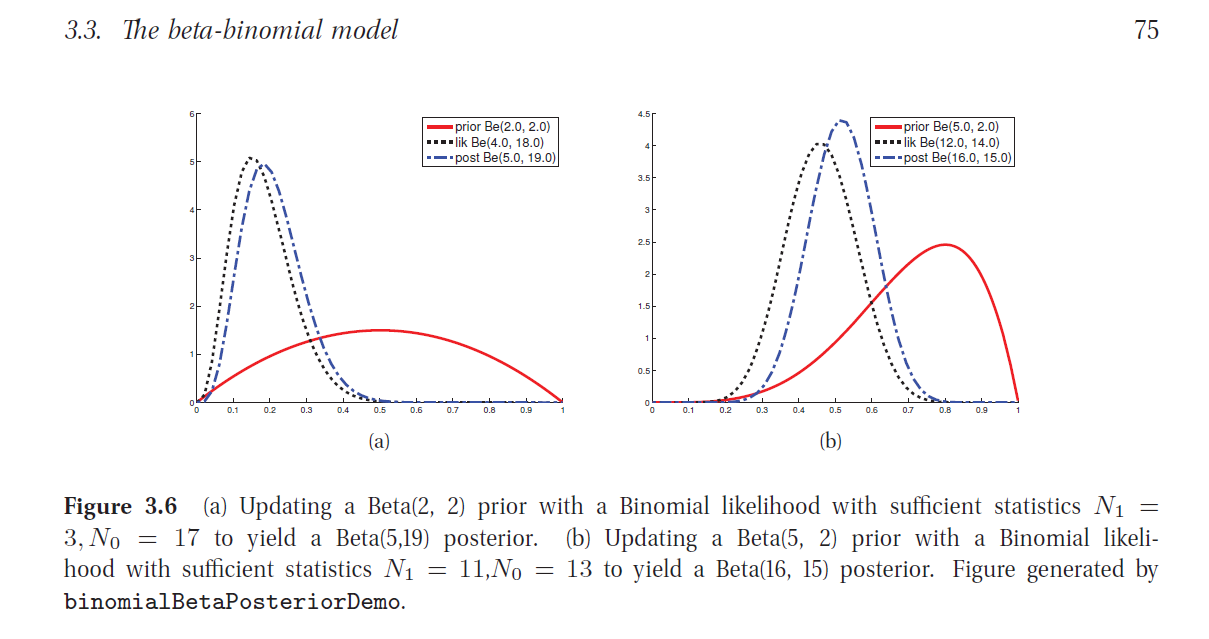

In [5]:

display_png(file="graficosBeta.png")

**Ejercicio 1:** Calcule la distribución a posteriori para el caso del modelo Beta-Bernoulli. 

**Ejercicio 2:** Calcule las siguientes probabilidades predictivas a posteriori:

i) $P(x=1 \mid \cal{D})$ considerando que hay un sólo ensayo ( o ses K=1).

ii)$P(x \mid \cal{D}, M)$ considerando que hay M ensayos.

**i) El modelo Dirichlet-multinomial**

Consideremos el caso en que 

$$ {\bf{X}}=(x_1,....x_K) \sim Multinomial(n,{\bf{\theta}}) \qquad x_i \in \{0,...,n\}, n=\sum_{k=1}^K x_k , \qquad {\bf{\theta}}=(\theta_1,...,\theta_K)  $$

$$ P(X = (x_1,...,x_k) \mid {\bf{\theta} }) = {{n}\choose{x_1,...,x_k}}\prod_{k=1}^K\theta_k^{x_k}$$
De manera que la función de verosimilitud para n observaciones queda:
$$ P(\cal{D} \mid \bf{\theta}) \propto \prod_{k=1}^K\theta_k^{N_k}$$
donde
$$N_k = \sum_{i=1}^n (X_i)_k$$

Por otra parte, sea
$$ \theta = (\theta_1,...\theta_K) \sim Dirichlet(\alpha_1,...,\alpha_K) \qquad \theta_i \in [0,1], \sum_{k=1}^K \theta_i= 1, \alpha_i>0$$

$$f_{\theta}(\theta) = \frac{1}{B(\alpha)} \prod_{k=1}^K \theta_k^{\alpha_k-1} \qquad B(\alpha) = \frac{\prod_{k=1}^K \Gamma(\alpha_k)}{\Gamma(\alpha_1+...+\alpha_K)}$$

En este caso, resulta que la distribución a posteriori es también Dirichlet:
$$
\begin{align}
f_{\theta}(\theta \mid \cal{D}) & \propto P(\cal{D} \mid \theta)f_{\theta}(\theta) \nonumber \\
& \propto \prod_{k=1}^K \theta_k^{N_k}\theta_k^{\alpha_k-1} = \prod_{k=1}^K \theta_k^{N_k+\alpha_k-1} \nonumber 
\end{align}
$$
Es decir

$$(\theta \mid {\cal{D}}) \sim Dirichlet(\alpha_1+N_1,...,\alpha_K+N_k)$$


## Enfoque Bayesiano para la Selección de modelos
Si disponemos de un conjunto de modelos entre los cuales elegir, por ejemplo una familia de distribuciones de probabilidad paramétricas de complejidad diferente, estamos en presencia del problema de selección de modelos.


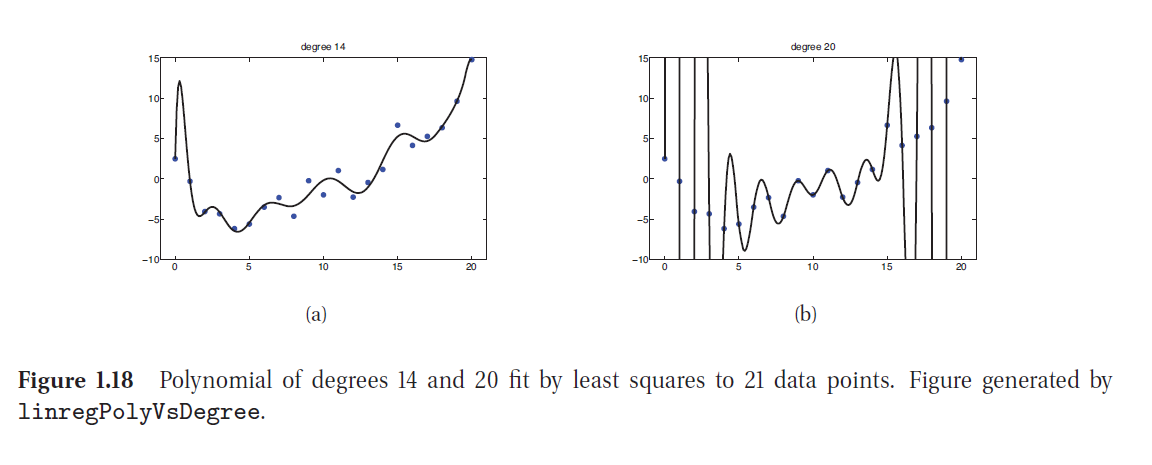

In [6]:
display_png(file="overfitting.png")

En el enfoque frecuentista, una manera de abordar esto es usar validación cruzada (cross-validation), para definir los errores para cada modelo y luego seleccionar el de mínimo error.

En el enfoque Bayesiano podemos hacer uso de la distribución predictiva de los datos o evidencia, por cada modelo $m$ y escoger el de mayor probabilidad dados los datos $\cal{D}$
$$p(m \mid \cal{D}) = \frac{p(\cal{D} \mid m) p(m) }{\sum_{m \in \cal{M}}p(\cal{D} \mid m) p(m)}$$

y entonces calculamos el modelo MAP:
$$\hat{m} = \underset{m \in \cal{M}}{\operatorname{argmax}}p(m \mid \cal{D})$$

Si consideramos una distribución  a priori no informativa sobre los modelos (distribución uniforme), es decir $p(m) \propto 1$, tenemos que:
$$p(m \mid \cal{D}) \propto p(\cal{D} \mid m) = \int p(\cal{D} \mid \theta) p(\theta \mid m) d\theta$$

llamada verosimilitud marginal o evidencia del modelo $m$.

Este cálculo es computacionalmente costoso en general y requiere utilizar técnicas del tipo Monte Carlo, salvo cuando tratamos con modelos de distribuciones conjugadas.

Veamos el **caso del modelo Beta-Binomial:**
En esta caso $$\cal{M} = \{ m_{a,b} \mid \theta \sim Beta(a,b), a,b>0 \}$$

Para el cálculo de $p(\cal{D} \mid m)$, recordemos que en este caso la distribución a posteriori se distribuye $Beta(a+N_1,b+N_0)$, entonces considerando Bayes tenemos:
$$
\begin{align}
p(\cal{D} \mid m) &= \frac{p(\cal{D} \mid \theta, m) p(\theta \mid m)}{p(\theta \mid \cal{D},m)} \nonumber \\
&= \frac{\left({{N}\choose{N_1}}\theta^{N_1-1}(1-\theta)^{N_0-1}\right)\left( \frac{1}{B(a,b)}\theta^{a-1}(1-\theta)^{b-1}\right)}
{\left(\frac{1}{B(a+N_1,b+N_0)}\theta^{a+N_1-1}(1-\theta)^{b+N_0-1}\right)}
&= {{N}\choose{N_1}} \frac{B(a+N_1,b+N_0)}{B(a,b)}
\end{align}
$$


#### Aproximación BIC del logaritmo de la verosimilitud marginal
Considerando que el cálculo de la verosimilitud marginal es en general costoso, Schwartz(1978) propone el Criterio de Información Bayesiano (BIC), como una aproximación del logaritmo de la verosimilitud marginal:
$$BIC = log p(\cal{D} \mid \hat{\theta}) -\frac{dof(\hat{\theta})}{2} log N \approx \log p(\cal{D})$$
donde $dof(\hat{\theta})$ son los grados de liberdad del modelo y $\hat{\theta}$ es el estimador de máxima verosimilitud de $\theta$.

De esta manera el BIC se puede interpretar como una versión del logaritmo de la verosimilitud **penalizada** por la complejidad del modelo. 

**Ejercicio 3:** Considere el modelo Beta-Binomial y que 
las observaciones nos proporcionan como estadísticos $N_1=3 y N_0=17$.
Calcule la verosimilitud marginal y el estadístico BIC para seleccionar el mejor modelo, 
dado que se considera conocido el valor del parámetro $b=2$. Explore valores para $a \in (0,20)$.

